In [3]:
# we first need to download few datasets

import nltk

In [4]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\USER\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
# now let us import few important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# getting the data
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [7]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Lets explore the data a little bit

In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
#lets check out the length of each msg
messages['length']= messages['message'].apply(len)

In [11]:
messages.head(10)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


<AxesSubplot:ylabel='Frequency'>

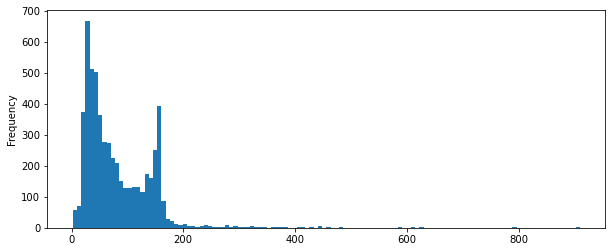

In [12]:
#now lets plot out some graphs
# graphs will help us to analyze better and we may find some comparison parameters

messages['length'].plot(bins=120,kind='hist',figsize=(10,4))

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
#lets read the really long msg of length 910 !
# out of context

messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

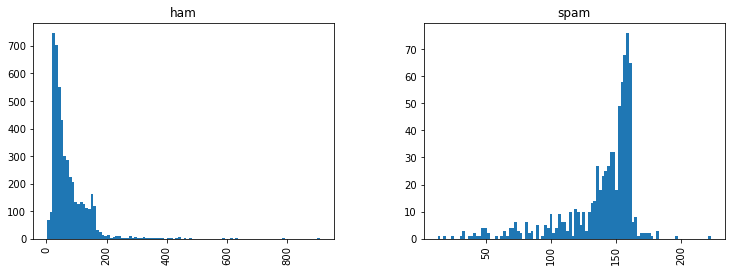

In [15]:
messages.hist(column='length',by='label',bins=100,figsize=(12,4))

In [16]:
# we may conclude that spam messages usually have more characters

# Text Pre-processing

Before we feed the text data into our model, we may preprocess the text to remove the punctuations and unnecessary common words
that makes it easy for our model to distinguish among the features.

In [17]:
# A sample of preprocessing

s = 'sample string, with punctuations!'

In [18]:
import string

In [19]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
nonpunc = [c for c in s if c not in string.punctuation] 

In [21]:
nonpunc = ''.join(nonpunc)

In [22]:
nonpunc

'sample string with punctuations'

In [23]:
nonpunc.split()

['sample', 'string', 'with', 'punctuations']

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
# lets remove the stop words

sentence = [words for words in nonpunc.split() if words.lower() not in stopwords.words('english')]

In [27]:
sentence

['sample', 'string', 'punctuations']

In [28]:
# creating a function that preprocess our text like the above shown manner


def text_preprocessor(mess):
    """
    1. Remove punctuations
    2. Remove stopwords
    3. Returns cleaned text
    """
    # removing punctuations
    nonpunc = [c for c in mess if c not in string.punctuation]
    
    # joining the characters
    nonpunc = ''.join(nonpunc)
    
    # removing stopwords
    return [words for words in nonpunc.split() if words.lower() not in stopwords.words('english')]

In [29]:
# testing our function

messages['message'].head(5).apply(text_preprocessor)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorisation

In [30]:
# lets convert the words of our messages into vectors and create the sparse matrix

from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# now we create an instance of our bag of words model
bow_transform = CountVectorizer(analyzer=text_preprocessor).fit(messages['message'])# bow stands for bag of words

In [33]:
#printing totalnumber of words
print(len(bow_transform.vocabulary_))

11425


In [34]:
#printing the 3rd msg
messages['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [35]:
#testing our bow function on the 3rd msg
mess3 = messages['message'][2]
bow3 = bow_transform.transform([mess3])

#printing the vector form of the msg
print(bow3)
#printing the shpe of the sparse matrix
print('\n')
print('Shape of sparse matrix-',bow3.shape)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


Shape of sparse matrix- (1, 11425)


In [36]:
# we can grab the particular word corresponding to a particular vector point
print(bow_transform.get_feature_names()[1833])
print(bow_transform.get_feature_names()[6331])

FA
entry


In [37]:
# applying our bag of words function to our whole message dataset
mess_transformed = bow_transform.transform(messages['message'])

In [38]:
#shape of sparse matrix
print('shape of sparse matrix-',mess_transformed.shape)

print('\n')

#number of non zero occurences
print('No. of non zero occurences = ',mess_transformed.nnz)

shape of sparse matrix- (5572, 11425)


No. of non zero occurences =  50548


In [39]:
# now we print the sparsity of the matrix
sparsity = (100 * mess_transformed.nnz/(mess_transformed.shape[0] * mess_transformed.shape[1]))
print('Sparsity: ',sparsity)

Sparsity:  0.07940295412668218


# Tf Idf

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
# creating an instance and fitting our data
tfidf_transformer = TfidfTransformer().fit(mess_transformed)

In [42]:
# checking idf of sample word
print(tfidf_transformer.idf_[bow_transform.vocabulary_['Hello']])

6.014770874925312


In [43]:
#transforming our entire bag of words into Tf idf corpus
mess_tfidf = tfidf_transformer.transform(mess_transformed)

In [44]:
print(mess_tfidf.shape)

(5572, 11425)


# Training and Evaluation

In [45]:
# we are using the bayes naiver classification algorithm
from sklearn.naive_bayes import MultinomialNB

In [46]:
spam_detection_model = MultinomialNB().fit(mess_tfidf,messages['label'])

In [47]:
all_predictions = spam_detection_model.predict(mess_tfidf)

In [48]:
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(messages['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [51]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.2)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


# Pipelining

In [52]:
# creating a pipeline to put all that work together
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessor)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [77]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessor at 0x000002323E3A8160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [78]:
predictions = pipeline.predict(msg_test)

In [79]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       962
        spam       1.00      0.72      0.84       153

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

